<a href="https://colab.research.google.com/github/naashonomics/timeseries_python/blob/main/python_time_forecasting_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Time Series Forecasting with Prophet in Python**

Prophet library for time series prediction

In [8]:
#  import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import datetime as dt
# prophet model
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot
from sklearn.metrics import mean_absolute_error


**pandas:** This library is used for the analysis and manipulation of the data.

**numpy**: This library is used for numerical manipulation.

**matplotlib**: This library is used to visualize the data as charts and graphs.

Following modules from the Plotly:

**make_subplots**: This module is used for making subplots.

**graph_objects:** This module is used to render plots as objects in the notebook.

**datetime:** This module is used to manipulate dates and times.

**Prophet:** This library is used for forecasting time series data.

**add_changepoints_to_plot**: This function allows you to visualize the changepoints detected by the Prophet model.

**mean_absolute_error from sklearn.metrics:** This module is used to evaluate the Prophet model.

In [6]:
#Load the data
from google.colab import drive
drive.mount('/content/test')


Drive already mounted at /content/test; to attempt to forcibly remount, call drive.mount("/content/test", force_remount=True).



*   Load the dataset using pandas.
*   Print the first five rows of the Data Frame.
*   Perform descriptive statistics of a Data Frame.
*   Print a concise summary of the Data Frame and check if it contains any missing data.
*   Change the Date column type to datetime.

Use the read_csv method to load the dataset.

Use the head method to print the first five rows of the Data Frame.

Use the describe method to generate descriptive statistics of a Data Frame.

Use the info method to print a summary of the Data Frame.

Use the to_datetime method to change the column type to datetime.

In [12]:
# load and print the dataset
# data set https://www.kaggle.com/datasets/amandam1/twitter-daily-stock-prices-20132022
df = pd.read_csv('/content/test/My Drive/test/input.csv')

In [13]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-11-07,45.099998,50.090000,44.000000,44.900002,44.900002,117701600
1,2013-11-08,45.930000,46.939999,40.689999,41.650002,41.650002,27925300
2,2013-11-11,40.500000,43.000000,39.400002,42.900002,42.900002,16113900
3,2013-11-12,43.660000,43.779999,41.830002,41.900002,41.900002,6316700
4,2013-11-13,41.029999,42.869999,40.759998,42.599998,42.599998,8688300


In [14]:
# perform a basic statistical analysis
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2172.000000,2172.000000,2172.000000,2172.000000,2172.000000,2.172000e+03
mean,35.759811,36.435994,35.069503,35.732063,35.732063,2.191115e+07
std,14.305437,14.562577,14.003070,14.269980,14.269980,1.907344e+07
min,13.950000,14.220000,13.730000,14.010000,14.010000,3.661100e+06
25%,24.822500,25.549999,24.129999,24.862501,24.862501,1.258305e+07
50%,34.900002,35.430000,34.295000,34.754999,34.754999,1.713035e+07
75%,44.209999,45.095000,43.230000,44.132500,44.132500,2.430645e+07
max,78.360001,80.750000,76.050003,77.629997,77.629997,2.684654e+08


In [15]:
# print a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2172 entries, 0 to 2171
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2172 non-null   object 
 1   Open       2172 non-null   float64
 2   High       2172 non-null   float64
 3   Low        2172 non-null   float64
 4   Close      2172 non-null   float64
 5   Adj Close  2172 non-null   float64
 6   Volume     2172 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 118.9+ KB


In [16]:
# change the Date column type to datetime
df["Date"] = pd.to_datetime(df['Date'])

Explore the data by visualizing the dataset with different interactive graphs using the Plotly module. Create subplots using the plotly.subplots library. Perform the following operations:

Create a figure using the make_subplots() method and pass the number of rows and columns to this method.

Use the add_trace() method to add a new plot inside the subplot.

Pass a go.Scatter() plot to the add_trace() method to view the plot.

Update the layout using the figure created above.

In [17]:
# create the subplots

"""
Create a new figure using the make_subplots() method and pass the following values to the parameters:

2 to the col
3 to the row
"""
columns = df.columns[1:]
fig = make_subplots(rows=3, cols=2, subplot_titles=columns)
for row in range(1, 4):
    for col in range(1, 3):
        column = columns[row * col - 1]
        fig.add_trace(go.Scatter(x = df['Date'] ,y = df[column]),row=row, col=col)
fig.update_layout(height=1500, width=1000, title_text="Twitter Data", showlegend=False)
fig.show()

display the sum of Volume column values for each year to determine which year has the most volume of stocks. Perform the following operations:
*   Group the Volume column for each year and find the sum of Volume data for each year.
*  Create a pie chart for those sum values you created above using the go.Pie chart. The chart should display years as labels for each slice of the pie chart.

In [18]:
# create the pie chart

"""
Create a new column Year that contains the year for all stock data.
Use the groupby method to group the sum of Volume data against each Year.
Use the go.Figure object to display the pie chart.
"""
df['Year'] = df['Date'].dt.year
df_pie = df.groupby('Year')['Volume'].sum()

layout = {
    'title': 'Pie Chart for Sum of Volume Data against Each Year'}

fig = go.Figure(data=[go.Pie(labels=df_pie.index, values=df_pie.values, textinfo='label')], layout=layout)
fig.show()

Create an OHLC Chart

 OHLC (Open-High-Low-Close) chart for Twitter stock prices using Plotly to identify trends and potential trading opportunities. Implement the following in the OHLC chart:


*   If the closing price is higher than the open price for a specific date, then represent the bar with a green line. Otherwise, represent the bar with a red line.
*   Find the dates of significant events in Twitter's history and add the vertical bars on the chart for those dates, along with some specific labels. Infer how those events cause an impact on the stock data.

Some significant events are the following:

    *   Jack Dorsey became CEO of Twitter on October 05, 2015.
    *   The lockdown started in the USA due to COVID19 on March 03, 2020.

* Add a horizontal slide bar along with the chart to easily navigate through a large amount of data.

In [19]:
# create the OHLC chart

"""
Use the plotly.graph_objects.Ohlc class to create an OHLC chart object.

Use the shapes key to add vertical bars.

Use the annotations key to add labels in the chart.

"""

data = go.Ohlc(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'],
               increasing=dict(line=dict(color= '#58FA58')),
                decreasing=dict(line=dict(color= '#FA5858')))

layout = {
    'title': 'Twitter Stocks',
    'xaxis': {'title': 'Date',
             'rangeslider': {'visible': False}},
    'yaxis': {'title': 'Stock Price (USD$)'},
    'shapes': [{
        'x0': '2015-10-05', 'x1': '2015-10-05',
        'y0': 0, 'y1': 1, 'xref': 'x', 'yref': 'paper',
        'line': {'color': 'rgb(30,30,30)', 'width': 1}
        },
        {
        'x0': '2020-03-15', 'x1': '2020-03-15',
        'y0': 0, 'y1': 1, 'xref': 'x', 'yref': 'paper',
        'line': {'color': 'rgb(30,30,30)', 'width': 1}
    }
    ],
    'annotations': [{
        'x': '2015-10-05', 'y': 0.6, 'xref': 'x', 'yref': 'paper',
        'showarrow': False, 'xanchor': 'left',
        'text': 'Jack Dorsey becomes CEO of Twitter.'
        },
        {
        'x': '2020-03-15', 'y': 0.05, 'xref': 'x', 'yref': 'paper',
        'showarrow': False, 'xanchor': 'left',
        'text': 'Lockdown started in USA due to Covid19.'
    }
    ]
}

fig = go.Figure(data=[data], layout=layout)
fig.update(layout_xaxis_rangeslider_visible=True)
fig.show()

Take a Closer Look at the OHLC Chart

You might have noticed a growth in the OHLC chart after the lockdown started in the USA. Let's take a closer look at the stocks after this lockdown date. In this task, create a candlestick chart using Plotly to plot not only the opening and closing prices but also the high and low prices for this time period represented by the candlestick. Implement the following in the candlestick chart:


*   If the closing price is higher than the open price for a specific date, then represent the candlestick with a green line. Otherwise, represent the candlestick with a red line.
*   Find the peak value between all of the columns and draw a horizontal line on the chart along with the label at the peak value
*   Add a horizontal slide bar along with the chart to easily navigate through a large amount of data.




.



In [20]:
# create the candlestick chart

"""
Use the plotly.graph_objects.Candlestick class to create a candlestick chart object.

Use the shapes key to add the horizontal bar.

Use the annotations key to add labels in the chart.
"""
after_covid = df.loc[df['Date'] > '2020-03-15']
max_value = after_covid.iloc[:,1:-2].max().max()

g = after_covid.groupby(["Date"])
monthly_averages = g.aggregate({"Open": np.mean, "High": np.mean, "Low": np.mean, "Close":np.mean})
monthly_averages.reset_index(level=0, inplace=True)

trace = go.Candlestick(x=monthly_averages['Date'],
                       open=monthly_averages['Open'].values.tolist(),
                       high=monthly_averages['High'].values.tolist(),
                       low=monthly_averages['Low'].values.tolist(),
                       close=monthly_averages['Close'].values.tolist(),
                      increasing=dict(line=dict(color= 'red')),
                decreasing=dict(line=dict(color= 'lightgreen')))

layout = {
    'title': 'Twitter Stocks <br> <i> After Covid </i>',
    'xaxis': {'title': 'Date',
             'rangeslider': {'visible': False}},
    'yaxis': {'title': 'Stock Price (USD$)'},
    'shapes': [{
        'x0': 0, 'x1': 1,
        'y0': max_value, 'y1': max_value, 'xref': 'paper',
        'line': {'color': 'rgb(30,30,30)', 'width': 1}
        }],
    'annotations': [{
        'x': '2020-03-15', 'y': 0.95, 'xref': 'x', 'yref': 'paper',
        'showarrow': False,
        'text': 'Peak Value = %f' %max_value
    }]
}


data = [trace]

fig = go.Figure(data=data, layout=layout)
fig.update(layout_xaxis_rangeslider_visible=True)
fig.show()

Visualize the Moving Average
The moving average is a statistic commonly used to analyze time series data. It calculates the average price of stocks over a certain period.

In this task, calculate the 10-day, 50-day, and 200-day moving averages for the close price of the Twitter stock. Also, plot the line graph for these three averages and the original close price values to find the general trend of the data.

In [21]:
# Moving Averages (10, 50 and 200)
"""
Use the rolling().mean() method with the specific window size to calculate the moving averages.

Create a subplot using the make_subplots method and use the append_trace method to plot the lines on the chart.
"""

df['10D_avg'] = df.Close.rolling(window=10).mean()
df['50D_avg'] = df.Close.rolling(window=50).mean()
df['200D_avg'] = df.Close.rolling(window=200).mean()

# Plot
fig = make_subplots()

colors = ['#ffF500', '#E6a1cf', '#6E6E6E']
avgs = ['10D_avg', '50D_avg', '200D_avg']

fig.append_trace({'x': df["Date"], 'y': df['Close'], 'type': 'scatter', 'name': 'Close', 'line': {'color': 'green'}}, 1, 1)

for col, c in zip(avgs, colors):
    fig.append_trace({'x': df["Date"], 'y': df[col], 'type': 'scatter', 'name': col, 'line': {'color': c}}, 1, 1)

fig['layout'].update(height=800, title='Relationship between MAs and Closing Price')

fig.show()

Predict the Future Stocks

In this task, predict the future close prices for Twitter stocks using the Prophet model. Perform the following operations:


*   Create a new Data Frame containing dates and the close price of the Twitter stocks.
*   Train the Prophet model on that Data Frame.
*   Predict the future close price of each day for a period of one year using Prophet.
*  Print some of the rows from the predicted close prices.








In [22]:
# create a new dataframe for training

"""
The column names for the new Data Frame should be ds for datastamp values and y for close prices.

Use the fit method of Prophet to train the Data Frame.

Create a future dataframe using the make_future_dataframe method.

Predict the close prices using the predict method of Prophet.

"""

df2 = df[["Date", "Close"]]
df2.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)
df2.head()

<ipython-input-22-de1242b3c113>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ds,y
0,2013-11-07,44.900002
1,2013-11-08,41.650002
2,2013-11-11,42.900002
3,2013-11-12,41.900002
4,2013-11-13,42.599998


In [23]:
# train the dataset
m = Prophet()

m.fit(df2)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5gvnqplz/1yhpi9fe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5gvnqplz/9ejujc5e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37254', 'data', 'file=/tmp/tmp5gvnqplz/1yhpi9fe.json', 'init=/tmp/tmp5gvnqplz/9ejujc5e.json', 'output', 'file=/tmp/tmp5gvnqplz/prophet_modelbl7y0772/prophet_model-20240203033558.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:35:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:35:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [24]:
# make the predictions
# Create Future dates
future_prices = m.make_future_dataframe(periods=365, freq='D')

# Predict Prices
forecast = m.predict(future_prices)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2532,2023-06-20,51.182787,41.053124,62.650195
2533,2023-06-21,51.253187,40.231944,62.911722
2534,2023-06-22,51.450578,40.712958,63.858713
2535,2023-06-23,51.577966,40.907020,63.280366
2536,2023-06-24,46.618482,35.416266,58.584337


plot the forecasted data. Use the Prophet model to perform the following operations:



*  Plot the original data along with the predicted data lines. Add the change points in the form of vertical lines on that plotted chart. Also, add the uncertainty window on the chart to see how much the data can fluctuate in normal conditions.

Note: A change point refers to the time when the underlying statistical properties of the data suddenly shift or change.

*   Plot another line chart with the following three subplots:

1.   A plot that shows the general trend of the dataset

2.   A weekly seasonality plot to show how data points change over time on a weekly basis.

3.  A yearly seasonality plot to show how data points change over time on a yearly basis.







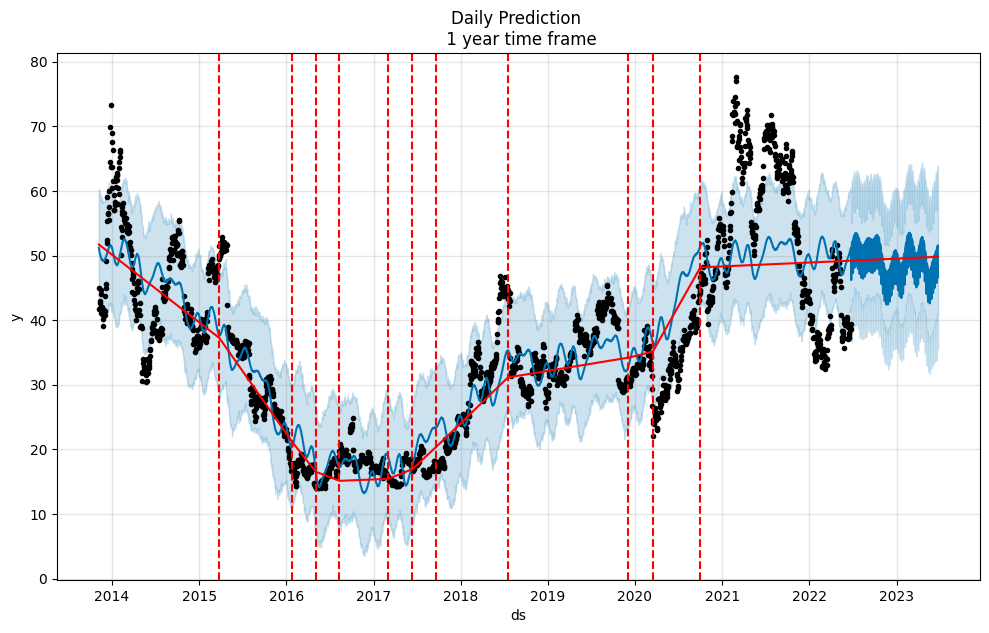

In [25]:
"""
Use the m.plot method to plot the Data Frame.

Use the add_changepoints_to_plot method to plot the change points.

Use the plot_components method of Prophet to plot the subplots.
"""
# plot the predicted data lines
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)
plt.title("Daily Prediction \n 1 year time frame")
plt.show()


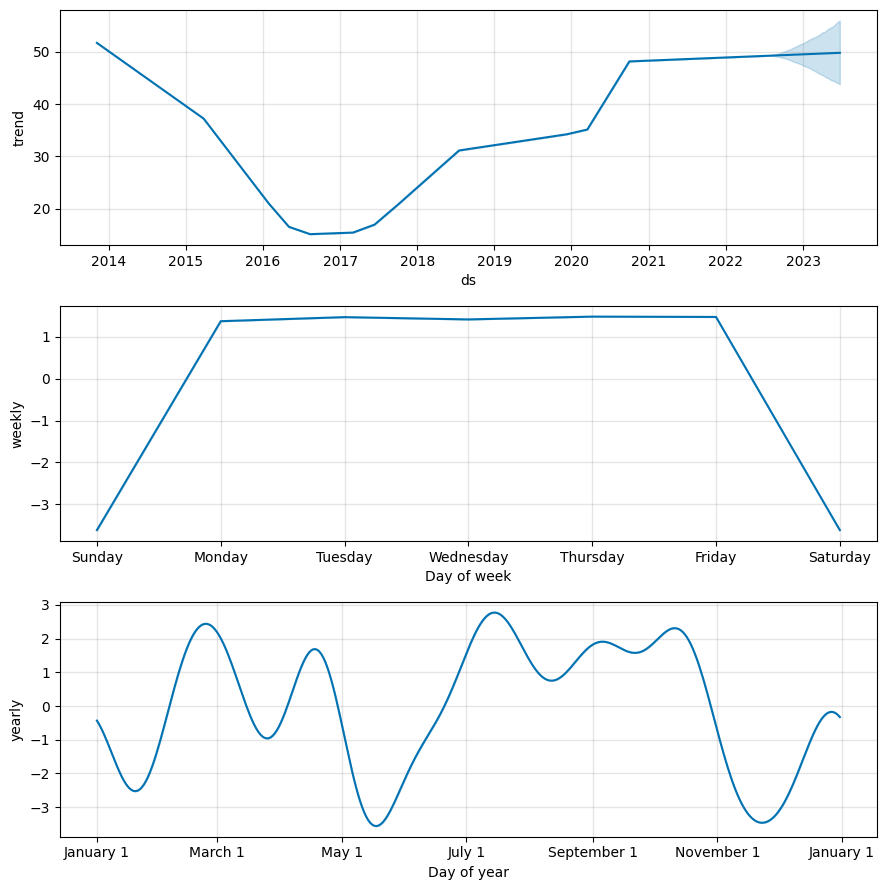

In [26]:
# create the subplots
fig = m.plot_components(forecast)
ax = fig.gca()
plt.show()

Forecast Monthly Stock Data
 forecast the close prices on a monthly basis with the aggregated values of all days in a specific month. Also, predict the values for the same time period i.e. one year in order to estimate a smoother trend of the data.

Also, plot the same charts for the monthly predictions that you created in Task 9.

Note: To avoid underfitting or overfitting of the data, set your change point scale appropriately. Make sure one of the change points in your chart should be the start of the USA lockdown along with other change points.

In [27]:
# forecast the monthly predictions

"""
Use the changepoint_prior_scale flag to set your change point scale in order to avoid overfitting or underfitting.

Create a new Data Frame with a gap of one month in order to predict the prices on a monthly basis.
"""

# forecast the monthly predictions
# Monthly Data Predictions
m = Prophet(changepoint_prior_scale=0.03).fit(df2)
future = m.make_future_dataframe(periods=12, freq='M')
fcst = m.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5gvnqplz/5j_6tsuy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5gvnqplz/hi7yk3ii.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81652', 'data', 'file=/tmp/tmp5gvnqplz/5j_6tsuy.json', 'init=/tmp/tmp5gvnqplz/hi7yk3ii.json', 'output', 'file=/tmp/tmp5gvnqplz/prophet_modelzup4sun6/prophet_model-20240203034636.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:46:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:46:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


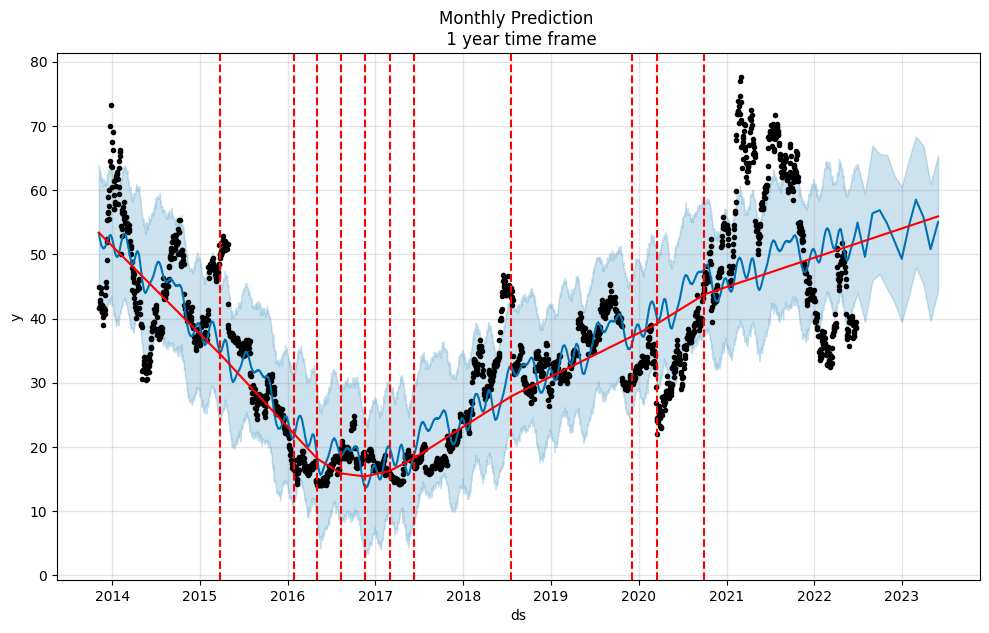

In [28]:
# plot the predicted data lines
fig = m.plot(fcst)
a = add_changepoints_to_plot(fig.gca(), m, fcst)
plt.title("Monthly Prediction \n 1 year time frame")
plt.show()

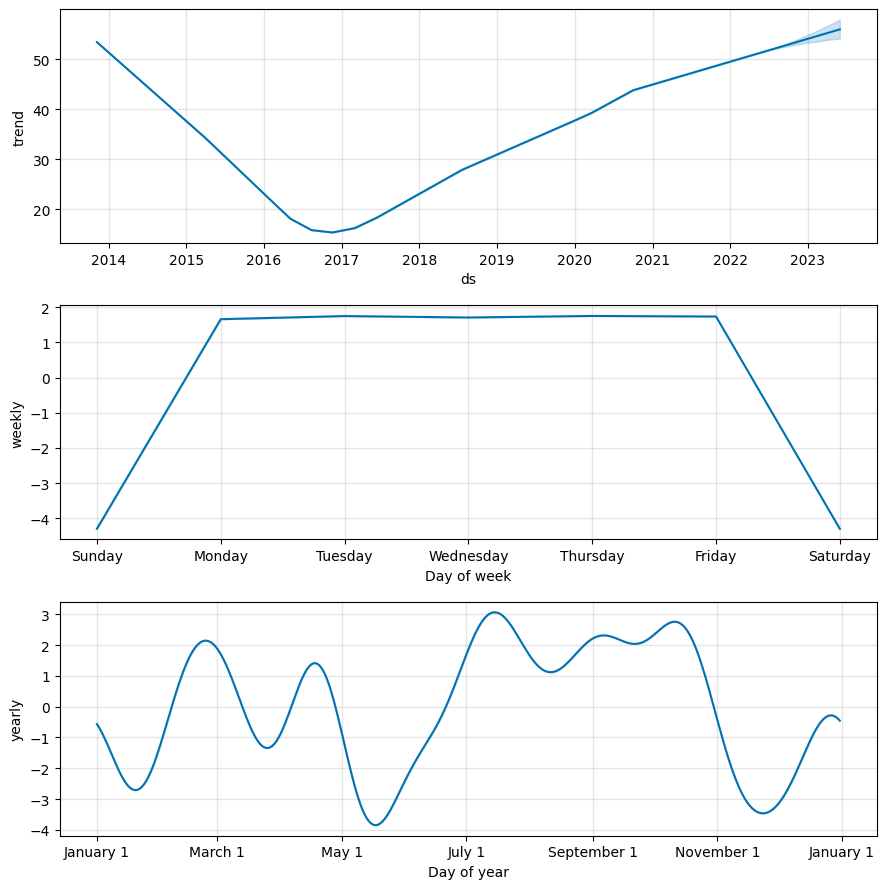

In [29]:
# create the subplots
fig = m.plot_components(fcst)
ax = fig.gca()
plt.show()

 Evaluate the Model
Use the mean absolute error method for evaluation of the Prophet model to see how well it worked on the provided dataset. Perform the following operations in this task:

Print the mean absolute error value of the monthly predicted values.

Create a line chart using Plotly, which contains two lines—one for actual closing prices and the other for the predicted closing prices by your model.


Use the mean_absolute_error method of the scikit-learn library in order to find the mean absolute error.

Use the go.Figure class to create the graph object.

Use the add_trace method to add specific data as lines on the chart.

In [30]:
# evaluate the model and print the mean absolute error
y_true = df2['y'].values
y_pred = fcst['yhat'][:-12].values
mae = mean_absolute_error(y_true, y_pred)
mae

6.134836468803228

In [31]:
# create the graph for comparison
fig = go.Figure()
fig.add_trace(go.Scatter(x=df2['ds'], y=y_true,
                    mode='lines',
                    name='Actual'))
fig.add_trace(go.Scatter(x=df2['ds'], y=y_pred,
                    mode='lines',
                    name='Predicted'))
fig['layout'].update(title='Line chart for Actual and Predicted values')
fig.show()